RETAIL SALES FORECASTING PROJECT

IMPORTS

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

DATA LOADING & CLEANING

In [63]:
df = pd.read_excel("/content/Online Retail.xlsx")
df.head()
df.info()
#Converting datetime
df["InviceDate"]=pd.to_datetime(df["InvoiceDate"])
df.dtypesdf = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["Sales"] = df["Quantity"] * df["UnitPrice"]
df.columns




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


/tmp/ipython-input-4051566655.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dtypesdf = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InviceDate', 'Sales'],
      dtype='object')

In [64]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]
df.columns



Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InviceDate', 'Sales'],
      dtype='object')

In [65]:
df["month"] = df["InvoiceDate"].dt.month
df["day_of_week"] = df["InvoiceDate"].dt.dayofweek
df["hour"] = df["InvoiceDate"].dt.hour
#Simple EDA
monthly_sales=df.groupby("month")["Sales"].sum()


One row represents: One product sold in a single invoice at a specific time.

The time column is: InvoiceDate

The business metric is: Sales (Quantity × UnitPrice)


MONTHLY PLOT

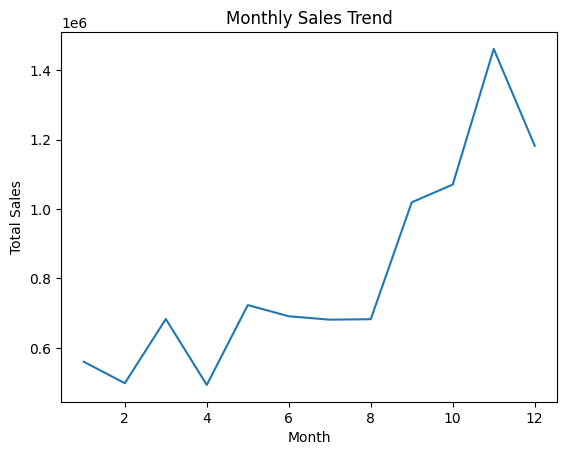

In [66]:
plt.figure()
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


ADDING COLUMN

In [67]:

df["is_weekend"] = df["InvoiceDate"].dt.dayofweek.isin([5, 6]).astype(int)
weekday_sales = df.groupby("is_weekend")["Sales"].mean()
weekday_sales




,Sales
is_weekend,
0,18.725513
1,12.515400


TIME SERIES PREPARATION

In [68]:
df["month_year"] = df["InvoiceDate"].dt.to_period("M")

monthly_ts = df.groupby("month_year")["Sales"].sum()
monthly_ts.index = monthly_ts.index.to_timestamp()

monthly_ts.head()


,Sales
month_year,
2010-12-01,748957.020
2011-01-01,560000.260
2011-02-01,498062.650
2011-03-01,683267.080
2011-04-01,493207.121


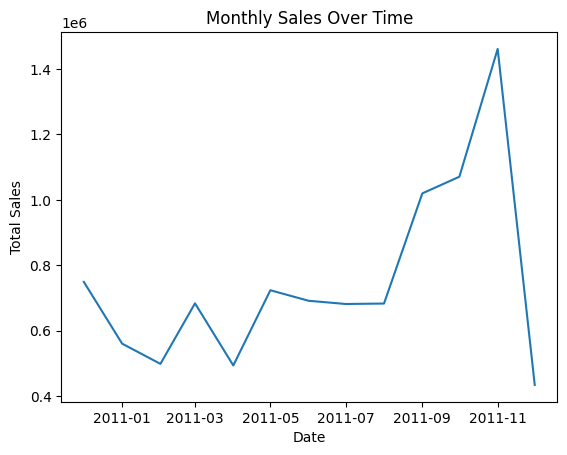

In [69]:
#Plot the time series (before forecasting)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(monthly_ts)
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


SALES FORECASTING (ARIMA)

In [70]:
# Training Forecasting model (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_ts, order=(1, 1, 1))
model_fit = model.fit()
#Forecasting future sales
forecast = model_fit.forecast(steps=6)
forecast



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


,predicted_mean
2012-01-01,1.047047e+06
2012-02-01,8.606053e+05
2012-03-01,9.172759e+05
2012-04-01,9.000504e+05
2012-05-01,9.052862e+05
2012-06-01,9.036947e+05


FORECAST VISUALISATION

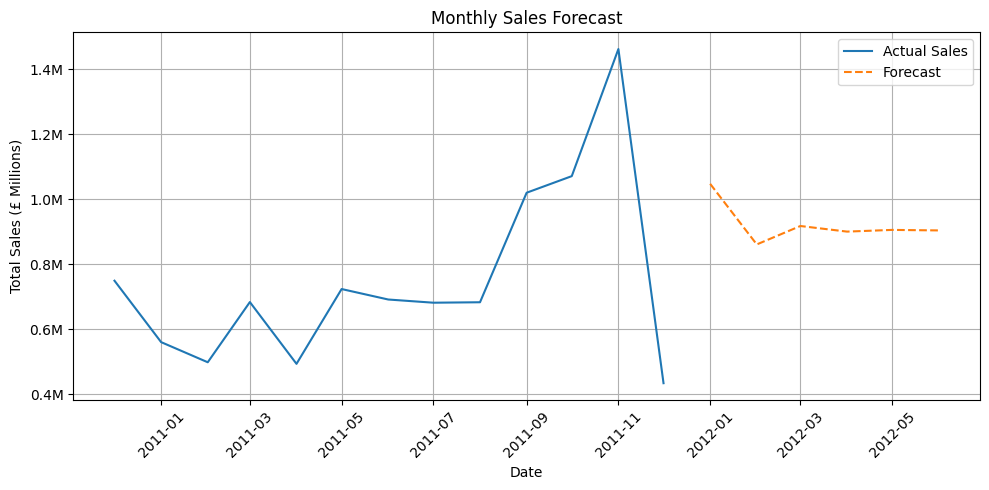

In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 5))

# Plot actual and forecast
plt.plot(monthly_ts, label="Actual Sales")
plt.plot(forecast, label="Forecast", linestyle="--")

# Format y-axis to show millions
formatter = FuncFormatter(lambda x, pos: f"{x/1_000_000:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Total Sales (£ Millions)")
plt.title("Monthly Sales Forecast")

# Improve readability
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



 Final Insights

- Historical sales data shows clear seasonal variation.
- Weekday and weekend sales behaviour differs, which can inform staffing decisions.
- The ARIMA model provides a reasonable estimate of future monthly sales.
